---

# **Machine Learning Coursework 2**

---

For coursework 2 you will be asked to train and evalute several different classifiers: Naïve Bayes classifier, Random Forest classifier, and kNN classifier using the iris dataset. You will be asked to answer a series of questions relating to each individual model and questions comparing each model. 

#### You are free to use the sklearn library. 


Notes:
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!
- Upload your completed notebook using the VLE

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

### Marking 

The grades in this coursework are allocated approximately as follows:

|                                                    | mark  |  
|----------------------------------------------------|-------|
| Code                                               | 7     |
| Code Report/comments                               | 6     |
| Model questions                                    | 14    |  
| Model comparision questions                        | 18    |
| Total available                                    |**45** |  

##### Remember to save your notebook as “CW2.ipynb”. It is a good idea to re-run the whole thing before saving and submitting. 










## 1 Classifiers [7 marks total]
Code and train your three classifiers in the cells below the corresponding header. You do not need to implement cross-validation in this coursework, simply fit the data. You are free to use sklearn and other packages where necessary.  



In [1]:
# import datasets
from sklearn import datasets 

# load data
iris = datasets.load_iris() # load data 
#print(iris.DESCR) # print dataset description

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB,CategoricalNB,BernoulliNB,ComplementNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import numpy as np
import sklearn.naive_bayes
import seaborn as sns
import pandas as pd

In [3]:
random_state = 4003
split_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

### 1.1 Naïve Bayes Classifier [2]
Train a naïve bayes classifier in python. 

Use your code to fit the data given above. 


In [4]:
def runNaiveBayes(X, y, split_ratios):
    # Initialize a list to store results
    results = []

    # List of models to run
    model_sets = [
        {"model": GaussianNB(), 'algorithm': "Gaussian"},
        {"model": MultinomialNB(), 'algorithm': "Multinomial"},
        {"model": MultinomialNB(alpha=0, force_alpha=True), 'algorithm': "Multinomial (No smoothing)"},
        {"model": ComplementNB(), 'algorithm': "Complement"},
        {"model": ComplementNB(alpha=0, force_alpha=True), 'algorithm': "Complement (No smoothing)"},
        {"model": BernoulliNB(), 'algorithm': "Bernoulli"},
        {"model": BernoulliNB(alpha=0, force_alpha=True), 'algorithm': "Bernoulli (No smoothing)"},
        #{"model": CategoricalNB(), 'algorithm': "Categorical"},
        #{"model": CategoricalNB(alpha=0, force_alpha=False), 'algorithm': "Categorical (No smoothing)"},
    ]

    # Check if split_ratios is a single decimal or a list
    if not isinstance(split_ratios, list):
        split_ratios = [split_ratios]

    # Loop through each split ratio
    for split_ratio in split_ratios:
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio, random_state=random_state)

        # Loop through each model set
        for model_set in model_sets:
            # Train and predict
            y_pred = model_set['model'].fit(X_train, y_train).predict(X_test)
            
            # Calculate accuracy
            accuracy = round((X_test.shape[0] - (y_test != y_pred).sum()) / X_test.shape[0], 4)
            
            # Add result to the results list
            results.append({
                'split_ratio': split_ratio,
                'algorithm': model_set['algorithm'],
                'accuracy': accuracy
            })
            
    return results

In [5]:
def printReport(results):
    # Sort results by 'description' and then 'split_ratio'
    sorted_results = sorted(results, key=lambda x: (x['algorithm'], x['split_ratio']))

    # Generate report
    print("Performance Report:")
    print("{:<20} {:<15} {:<15}".format('Model', 'Split Ratio', 'Accuracy'))
    print('-' * 50)  # To print a separator line

    previous_description = None  # Variable to keep track of the last printed description

    for result in sorted_results:
        current_description = result['algorithm']

        # Print the description only if it's different from the last one
        if current_description != previous_description:
            print("{:<20} {:<15} {:<15}".format(current_description, result['split_ratio'], result['accuracy']))
            previous_description = current_description
        else:
            print("{:<20} {:<15} {:<15}".format('', result['split_ratio'], result['accuracy']))

In [6]:
def summarizeNaiveBayesAccuracy(results):
    # Extract unique split_ratios and algorithms from results
    split_ratios = sorted(set([res['split_ratio'] for res in results]))
    algorithms = sorted(set([res['algorithm'] for res in results]))

    # Create an empty numpy array to store accuracy scores
    accuracy_data = np.zeros((len(split_ratios), len(algorithms)))

    # Populate accuracy_data with accuracy scores
    for res in results:
        row_idx = split_ratios.index(res['split_ratio'])
        col_idx = algorithms.index(res['algorithm'])
        accuracy_data[row_idx, col_idx] = res['accuracy']

    # Create the heatmap
    plt.figure(figsize=(10, 6))
    im = plt.imshow(accuracy_data, cmap="viridis", aspect='auto')

    # Add color bar
    plt.colorbar(label="Accuracy")

    # Annotate each cell with the numeric value
    for i in range(len(split_ratios)):
        for j in range(len(algorithms)):
            plt.text(j, i, f"{accuracy_data[i, j]:.4f}", ha='center', va='center', color='w')

    # Add labels and title
    plt.title('Accuracy Across Configurations')
    plt.xticks(np.arange(len(algorithms)), algorithms, rotation=90)
    plt.yticks(np.arange(len(split_ratios)), split_ratios)
    plt.xlabel('Algorithms')
    plt.ylabel('split_ratio')

    plt.show()

In [7]:
naive_bayes_results = runNaiveBayes(iris['data'], iris['target'], split_ratios)
#printReport(results)

c:\Projects\UoL\(DSM040-2023-APR) Machine learning\DSM040_CW2\.venv\Lib\site-packages\sklearn\naive_bayes.py:1227: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
c:\Projects\UoL\(DSM040-2023-APR) Machine learning\DSM040_CW2\.venv\Lib\site-packages\sklearn\naive_bayes.py:1230: RuntimeWarning: invalid value encountered in add
  jll += self.class_log_prior_ + neg_prob.sum(axis=1)
c:\Projects\UoL\(DSM040-2023-APR) Machine learning\DSM040_CW2\.venv\Lib\site-packages\sklearn\naive_bayes.py:1227: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
c:\Projects\UoL\(DSM040-2023-APR) Machine learning\DSM040_CW2\.venv\Lib\site-packages\sklearn\naive_bayes.py:1230: RuntimeWarning: invalid value encountered in add
  jll += self.class_log_prior_ + neg_prob.sum(axis=1)
c:\Projects\UoL\(DSM040-2023-APR) Machine learning\DSM040_CW2\.venv\Lib\site-packages\sklearn\naive_bayes.py:1227: Runtime

### 1.2 Random Forst Classifier [3]
Train a random forest classifier in python. Use your code to fit the data given above. 

Evaluate feature performance of the model. 

Visualise the feature importance. 


In [8]:
def runRandomForest(X, y, split_ratios, n_estimators=[10, 50, 100]):
    # Initialize a list to store results
    results = []
    
    # Check if split_ratios is a single decimal or a list
    if not isinstance(split_ratios, list):
        split_ratios = [split_ratios]

    # Loop through each split ratio
    for split_ratio in split_ratios:
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio, random_state=random_state)

        # Loop through each number of estimators
        for n_estimator in n_estimators:
            # Initialize and train the Random Forest classifier
            model = RandomForestClassifier(n_estimators=n_estimator, random_state=random_state)
            model.fit(X_train, y_train)

            # Make predictions
            y_pred = model.predict(X_test)
            
            # Calculate accuracy
            accuracy = round((X_test.shape[0] - (y_test != y_pred).sum()) / X_test.shape[0], 4)
            
            # Add result to the results list
            results.append({
                'split_ratio': split_ratio,
                'n_estimators': n_estimator,
                'accuracy': accuracy,
                'feature_importances': model.feature_importances_
            })
            
    return results

In [9]:
def plotFeatureImportances(results, feature_names=None):
    # Initialize the subplot grid
    split_ratios = sorted(set([res['split_ratio'] for res in results]))
    n_estimators = sorted(set([res['n_estimators'] for res in results]))
    num_rows = len(split_ratios)
    num_cols = len(n_estimators)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    
    # Determine the maximum feature importance value across all results
    max_importance = max([max(res['feature_importances']) for res in results])
    
    # Loop through each split ratio and estimator pair in results
    for res in results:
        row_idx = split_ratios.index(res['split_ratio'])
        col_idx = n_estimators.index(res['n_estimators'])
        
        # Plotting on the appropriate subplot
        ax = axes[row_idx, col_idx]
        
        # Visualize feature importance
        if feature_names is None:
            feature_names = [f'feature_{i}' for i in range(len(res['feature_importances']))]
            
        sorted_idx = np.argsort(res['feature_importances'])
        ax.barh(range(len(res['feature_importances'])), res['feature_importances'][sorted_idx], align='center')
        ax.set_yticks(range(len(res['feature_importances'])))
        ax.set_yticklabels(np.array(feature_names)[sorted_idx])
        ax.set_xlabel('Feature Importance')
        ax.set_title(f'n_estimators={res["n_estimators"]}, split_ratio={res["split_ratio"]}')
        
        # Set the same x-axis range for all subplots
        ax.set_xlim([0, max_importance])
        
    # Show the full grid of plots
    plt.tight_layout()
    plt.show()

In [10]:
def summarizeFeatureImportance(results, feature_names=None):
    # Extract unique split_ratios and n_estimators from results
    split_ratios = sorted(set([res['split_ratio'] for res in results]))
    n_estimators = sorted(set([res['n_estimators'] for res in results]))

    # If feature_names is not provided, generate default feature names
    if feature_names is None:
        feature_names = [f'Feature_{i}' for i in range(len(results[0]['feature_importances']))]

    # Create an empty dictionary to store feature importances
    feature_data = {name: np.zeros((len(split_ratios), len(n_estimators))) for name in feature_names}

    # Populate feature_data with feature importances
    for res in results:
        row_idx = split_ratios.index(res['split_ratio'])
        col_idx = n_estimators.index(res['n_estimators'])
        for i, importance in enumerate(res['feature_importances']):
            feature_data[feature_names[i]][row_idx, col_idx] = importance

    # Create the heatmaps
    for feature, data in feature_data.items():
        plt.figure(figsize=(10, 6))
        im = plt.imshow(data, cmap="viridis", aspect='auto')

        # Add color bar
        plt.colorbar(label="Feature Importance")

        # Annotate each cell with the numeric value
        for i in range(len(split_ratios)):
            for j in range(len(n_estimators)):
                plt.text(j, i, f"{data[i, j]:.2f}", ha='center', va='center', color='w')

        # Add labels and title
        plt.title(f'Feature Importance of {feature} Across Configurations')
        plt.xticks(np.arange(len(n_estimators)), n_estimators, rotation=45)
        plt.yticks(np.arange(len(split_ratios)), split_ratios)
        plt.xlabel('n_estimators')
        plt.ylabel('split_ratio')

        plt.show()

In [11]:
def summarizeRandomForrestAccuracy(results):
    # Extract unique split_ratios and n_estimators from results
    split_ratios = sorted(set([res['split_ratio'] for res in results]))
    n_estimators = sorted(set([res['n_estimators'] for res in results]))

    # Create an empty numpy array to store accuracy scores
    accuracy_data = np.zeros((len(split_ratios), len(n_estimators)))

    # Populate accuracy_data with accuracy scores
    for res in results:
        row_idx = split_ratios.index(res['split_ratio'])
        col_idx = n_estimators.index(res['n_estimators'])
        accuracy_data[row_idx, col_idx] = res['accuracy']

    # Create the heatmap
    plt.figure(figsize=(10, 6))
    im = plt.imshow(accuracy_data, cmap="viridis", aspect='auto')

    # Add color bar
    plt.colorbar(label="Accuracy")

    # Annotate each cell with the numeric value
    for i in range(len(split_ratios)):
        for j in range(len(n_estimators)):
            plt.text(j, i, f"{accuracy_data[i, j]:.4f}", ha='center', va='center', color='w')

    # Add labels and title
    plt.title('Accuracy Across Configurations')
    plt.xticks(np.arange(len(n_estimators)), n_estimators, rotation=45)
    plt.yticks(np.arange(len(split_ratios)), split_ratios)
    plt.xlabel('n_estimators')
    plt.ylabel('split_ratio')

    plt.show()

In [12]:
def remove_nth_element(arr, n):
    return np.array([[item for index, item in enumerate(inner_list) if index != n] for inner_list in arr])

In [13]:
random_forest_results = runRandomForest(iris['data'], iris['target'], split_ratios, [5,10,25,50,75,100])

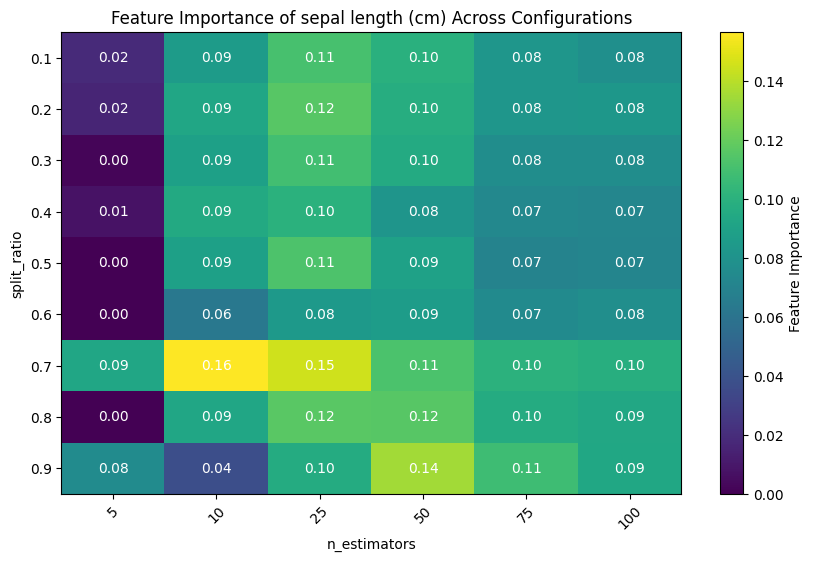

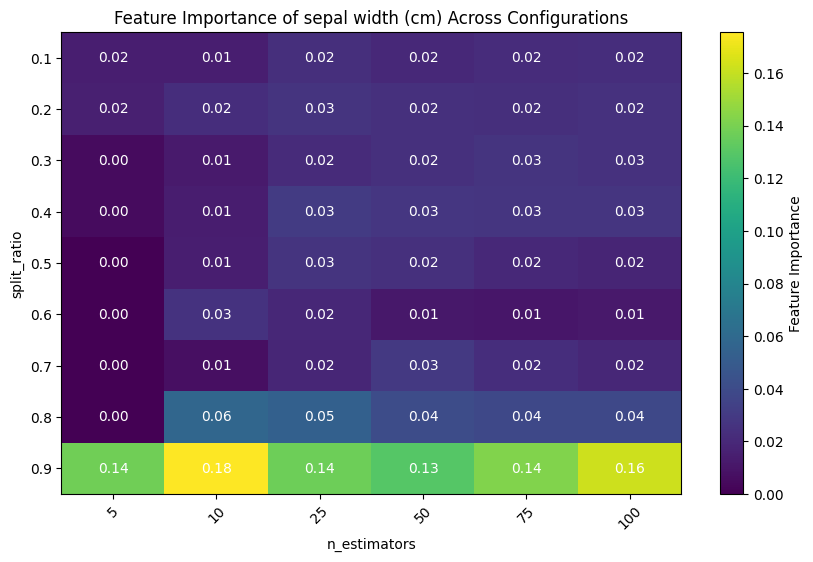

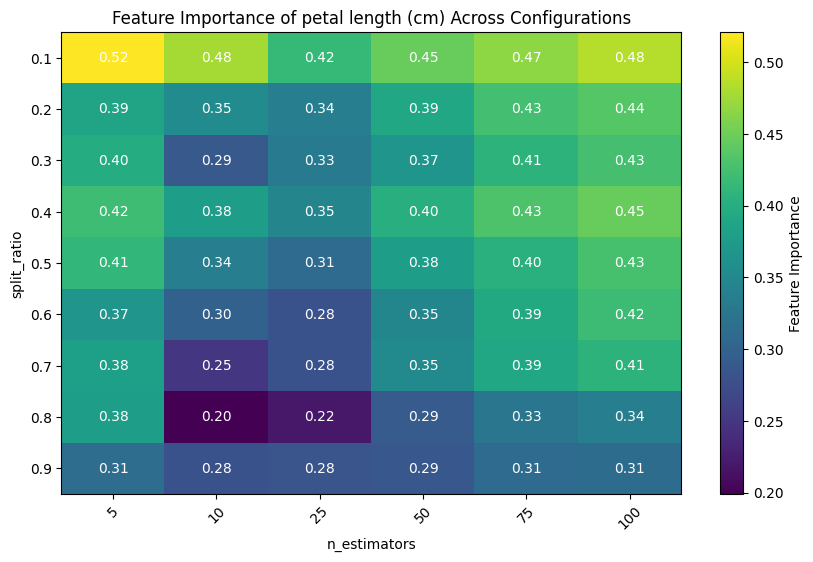

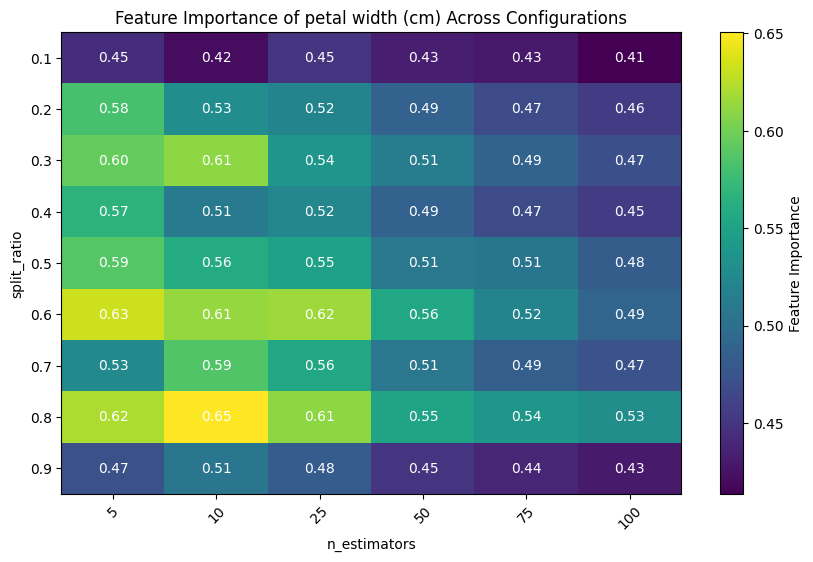

In [28]:
summarizeFeatureImportance(random_forest_results,iris['feature_names'])

From the feature importance matrices above, we can see that the importance of each feature is dependent on the on the on the amount of estimators in the model, as well as the volume of training data available.

We can see that while the "petal width (cm)" generally has the highest importance, in cases of low `split_ratio`, meaning a bigger set of training data, the "petal length (cm)" gains some importance over the first.

It is also interesting to note how the "sepal width (cm)" has a big increase in importance as the amount of training data decreases.

### 1.3 kNN Classifier [2]
Train a kNN classifier in python. 

Use your code to fit the data given above. 

In [14]:
def runKNN(X, y, split_ratios, k_values=[1, 2, 5], distance_metrics=['euclidean', 'manhattan']):
    # Initialize a list to store results
    results = []

    # Check if split_ratios is a single decimal or a list
    if not isinstance(split_ratios, list):
        split_ratios = [split_ratios]

    # Loop through each split ratio
    for split_ratio in split_ratios:
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio, random_state=random_state)

        # Loop through each k value
        for k in k_values:
            # Loop through each distance metric
            for metric in distance_metrics:
                # Initialize kNN model
                knn_model = KNeighborsClassifier(n_neighbors=k, metric=metric)

                # Train and predict
                y_pred = knn_model.fit(X_train, y_train).predict(X_test)

                # Calculate accuracy
                accuracy = round((X_test.shape[0] - (y_test != y_pred).sum()) / X_test.shape[0], 4)

                # Add result to the results list
                results.append({
                    'split_ratio': split_ratio,
                    'k_value': k,
                    'metric': metric,
                    'accuracy': accuracy
                })

    return results


In [15]:
def summarizeKnnAccuracy(results):
    # Extract unique split_ratios, k_values and metrics from results
    split_ratios = sorted(set([res['split_ratio'] for res in results]))
    k_values = sorted(set([res['k_value'] for res in results]))
    metrics = sorted(set([res['metric'] for res in results]))

    # Loop through each metric to create a heatmap
    for metric in metrics:
        # Create an empty numpy array to store accuracy scores
        accuracy_data = np.zeros((len(split_ratios), len(k_values)))

        # Populate accuracy_data with accuracy scores for the current metric
        for res in results:
            if res['metric'] == metric:
                row_idx = split_ratios.index(res['split_ratio'])
                col_idx = k_values.index(res['k_value'])
                accuracy_data[row_idx, col_idx] = res['accuracy']

        # Create the heatmap
        plt.figure(figsize=(10, 6))
        im = plt.imshow(accuracy_data, cmap="viridis", aspect='auto')

        # Add color bar
        plt.colorbar(label="Accuracy")

        # Annotate each cell with the numeric value
        for i in range(len(split_ratios)):
            for j in range(len(k_values)):
                plt.text(j, i, f"{accuracy_data[i, j]:.4f}", ha='center', va='center', color='w')

        # Add labels and title
        plt.title(f'Accuracy for metric: {metric}')
        plt.xticks(np.arange(len(k_values)), k_values, rotation=45)
        plt.yticks(np.arange(len(split_ratios)), split_ratios)
        plt.xlabel('k_value')
        plt.ylabel('split_ratio')

        plt.show()

In [16]:
knn_results = runKNN(iris['data'], iris['target'], split_ratios, k_values=[1, 2, 5, 10, 15], distance_metrics=['euclidean', 'manhattan','minkowski','cosine','chebyshev'])

## 2 Code Report [6 marks total]
In a markdown box, write a short report (no more than 500 words) that describes the workings of your code. 

The code for all of the implementations can be summarized as follows.
- A function is defined that receives the X and y values of the dataset, as well as an array of split ratios, depending on the type of classifier, the function may also receive arrays of other parameters such an array of k-values for kNN or an array of N-Estimators (tree-counts) for Random Forest.
- Within the functions, combinations of the parameters are used to train the classifiers.
- Within the iterations the datasets are split, the parameter sets are applied and the classifiers are trained.
- After training the test set is tested against the classifiers, and the accuracy of the classifier with its parameters is added to an array to be returned by the function.

The combinations used for the training are as follows:
- **Naïve Bayes:** Naive Bayes Distributions x Split Ratio (Train/Test split)
- **Random Forest:** N-Estimators (Number of trees in forest) x Split Ratio
- **kNN:** k-Vales x Split Ratio x Distance Metric

In addition to the functions to train and test the classifiers, functions to display the results of the classifiers is also provided.
These aim to display the results of the classifiers as heatmaps to get a good overview of the changes brought by the different combinations of the parameters. Some considerations made in the generation of the heatmaps:
- The compilation of the accuracy data matrix to be fed to the `plt.imshow` function of `matplotlib.pyplot`.
- The mapping of the display values over the grid of colors
- The labeling of the different parameters, whether in the titles or as labels
- The label orientation to prevent overlap of text.

A similar function was also created for displaying the change in feature importance for the Random Forest classifiers.

In attempt to display the effect of zero probability in the Naïve Bayes classifiers, MultinomialNB, ComplementNB, and BernoulliNB has been implemented with a 0, forced alpha value, this however did not result in satisfactory variation in the data.

## 3 Model Questions [14 marks total]
Please answer the following questions relating to your classifiers. 

### 3.1 Naïves Bayes Questions [4]
Why do zero probabilities in our Naïve Bayes model cause problems? 

How can we avoid the problem of zero probabilities in our Naïve Bayes model? 

Please answer in the cell below.

**Why do zero probabilities in our Naïve Bayes model cause problems?**

In the context of the Iris dataset, which consists of continuous data, zero probabilities are usually not considered to be a problem, as the model is not concerned with the likelihood of observing a particular value, but rather the likelihood of observing a value within a particular range (density). Meaning that the probability of observing a value could range from one to nearly zero, but not zero.

However, in other contexts, where categorical or discrete data is contained in the dataset, zero probabilities occur when a value is observed for a category which has not been included in the training data.

This may haver been a bigger problem, should it have been decided to bin the data within particular ranges and utilizing the CategoricalNB classifier.

**How can we avoid the problem of zero probabilities in our Naïve Bayes model?**

The most common solution to the problem of zero probabilities, is to add a single instance of a categorical variable to the training data, this ensures that the probability of a outcome is never zero. (Laplace Smoothing)

This could also be mitigated by removing less important features from the dataset, as those will then not be able to contribute to possible zero probabilities.

`sklearn` offers a variety of Naive Bayes algorithms to utilize, some of which will also cater for zero probabilities in different ways.

### 3.2 Random Forest Questions [6]
Which feature is the most important from your random forest classifier? 

Can any features be removed to increase accuracy of the model, if so which features? 

Explain why it would be useful to remove these features. 

Please answer in the cell below.

#### Which feature is the most important from your random forest classifier?

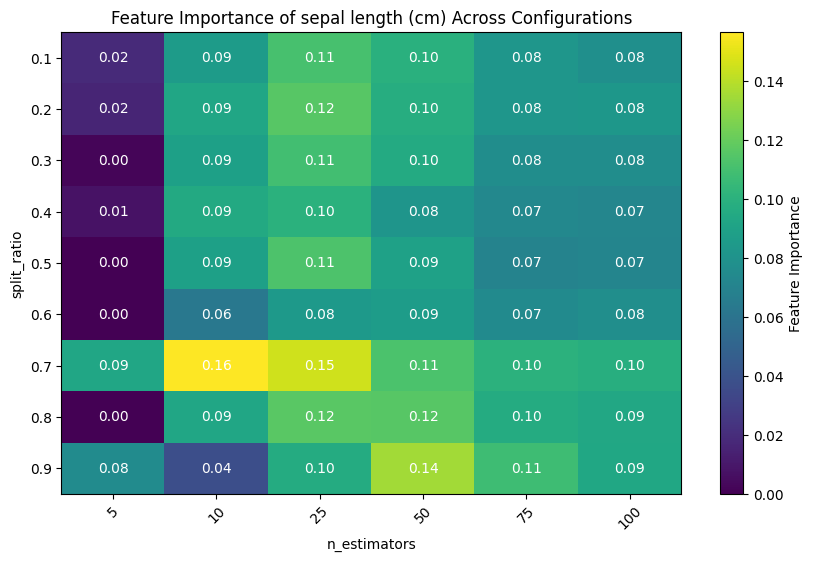

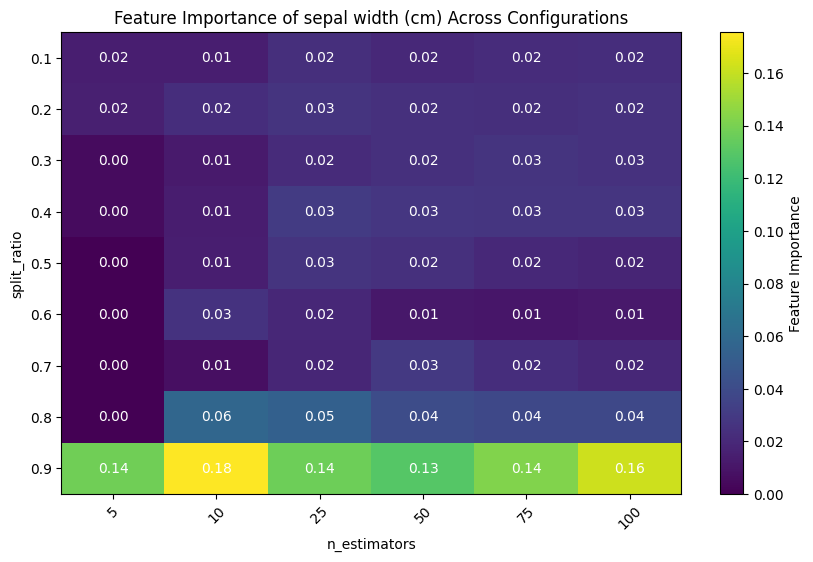

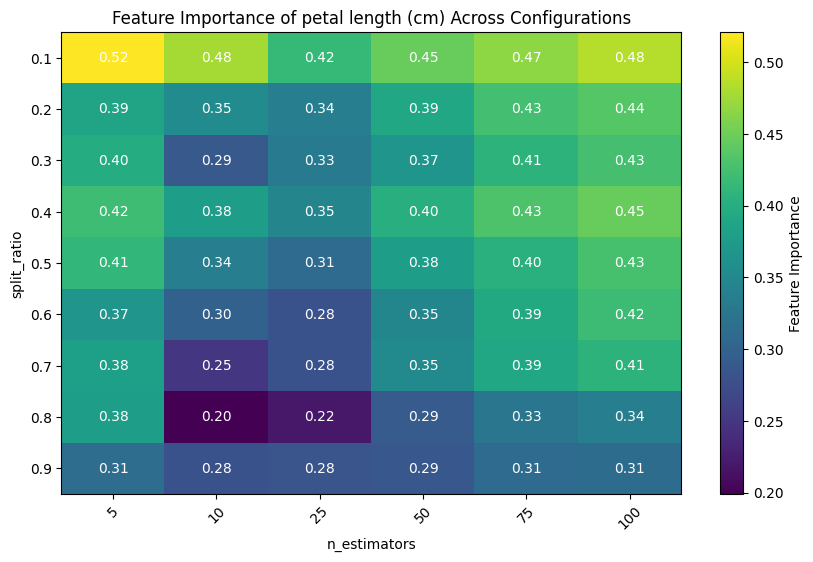

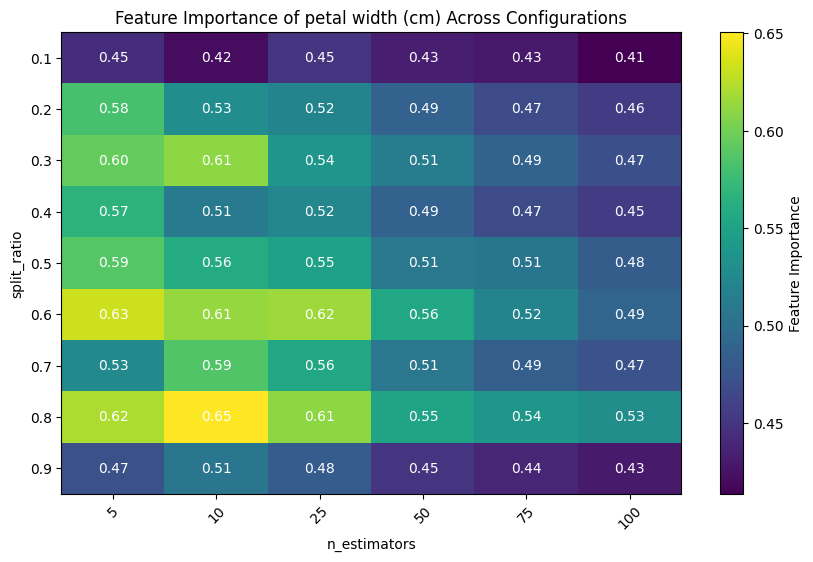

In [17]:
summarizeFeatureImportance(random_forest_results,iris['feature_names'])

From the feature importance matrices above, we can see that the importance of each feature is dependent on the on the on the amount of estimators in the model, as well as the volume of training data available.

We can see that while the "petal width (cm)" generally has the highest importance, in cases of low `split_ratio`, meaning a bigger set of training data, the "petal length (cm)" gains some importance over the first.

It is also interesting to note how the "sepal width (cm)" has a big increase in importance as the amount of training data decreases.

In the heatmap below, discussed later, it is seen a relatively high accuracy is possible even in the case of a small amount of training data. This means that the resulting model has a heavy reliance on the features that may have had a low importance in other cases. And although the accuracy is still high, this may lead to over-fitting of the model, which in turn may not be able to correctly classify unseen Iris data, should it contain outliers that would have otherwise satisfied the global trends.

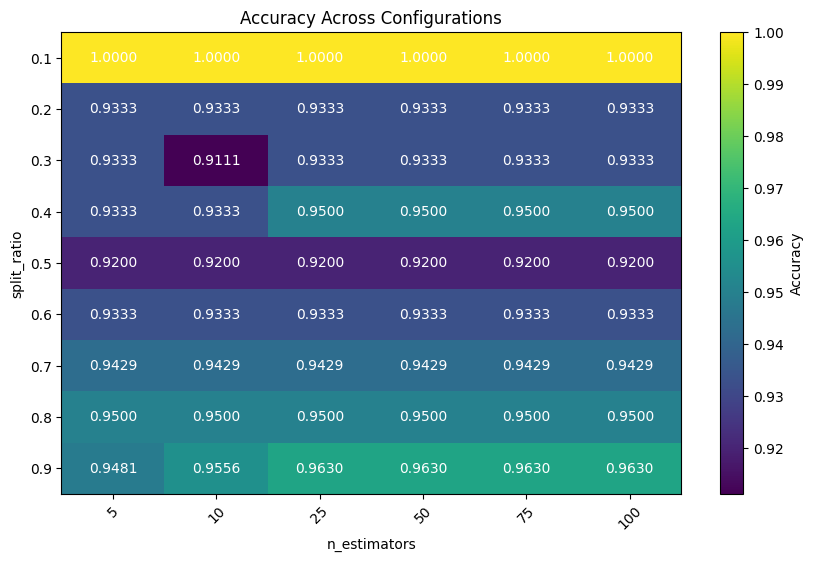

In [29]:
summarizeRandomForrestAccuracy(random_forest_results)

#### Can any features be removed to increase accuracy of the model, if so which features?

As shown in the matrices, and discussed above, the importance of features can vary, but in models where the `n_estimators` is and the training data isn't limited, the "sepal width (cm)" and "sepal length (cm)" features are of very little importance.

This can also be seen in the pairplot below:

c:\Projects\UoL\(DSM040-2023-APR) Machine learning\DSM040_CW2\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Projects\UoL\(DSM040-2023-APR) Machine learning\DSM040_CW2\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Projects\UoL\(DSM040-2023-APR) Machine learning\DSM040_CW2\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Projects\UoL\(DSM040-2023-APR) Machine learning\DSM040_CW2\.venv\Lib\site-packages\seaborn\_oldcore.

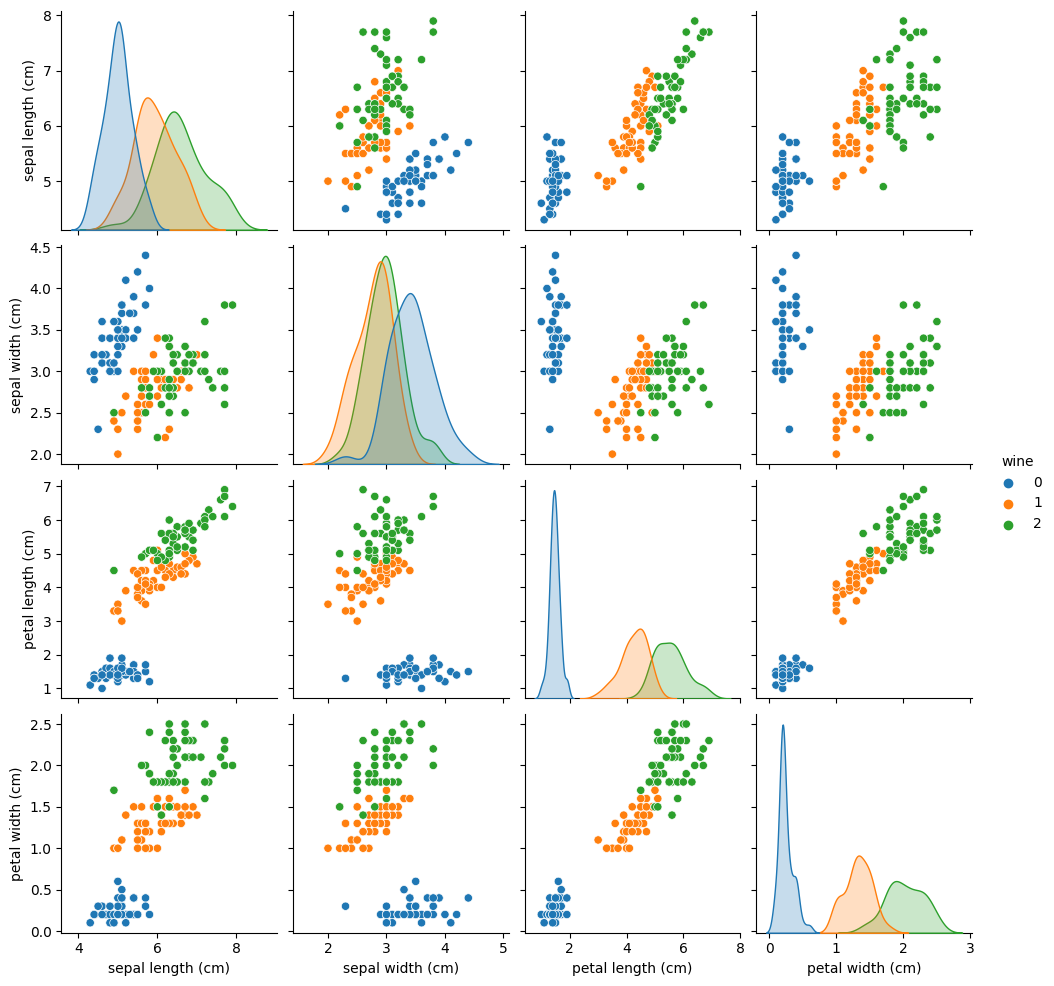

In [18]:
df = pd.DataFrame(iris['data'])
df.columns = iris['feature_names']
df['wine'] = iris['target']
sns.pairplot(
    df,
    hue='wine',
    palette=sns.color_palette()[:3]
    )

Here it is clear that iris 0 can be differentiated clearly in most cases. However, iris 1 and iris 2 has some overlap in all features, and significant overlap in combinations of "sepal width (cm)" and "sepal length (cm)"

Below we will demonstrate the effect of removing these features has on the accuracy of the predictions:

**Unchanged Dataset:**

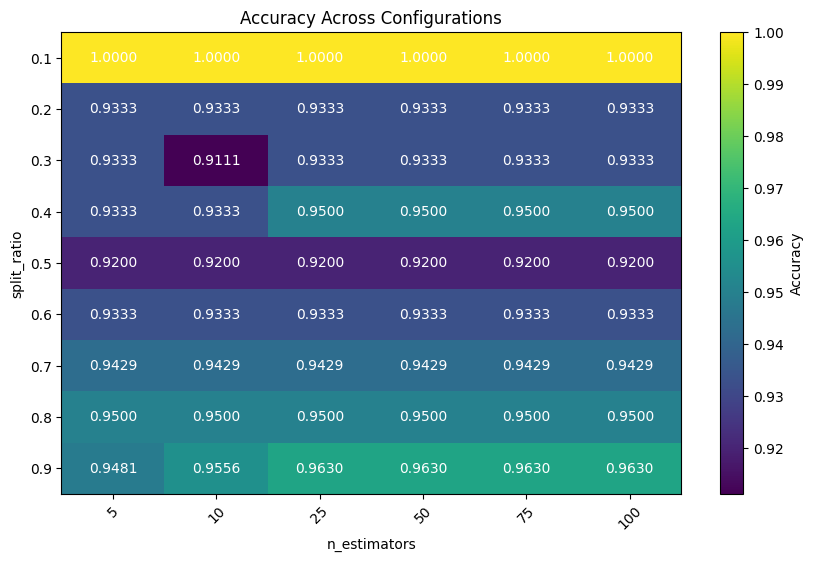

Average Accuracy: 0.945868518518519


In [19]:
summarizeRandomForrestAccuracy(random_forest_results)

average_accuracy = sum(result['accuracy'] for result in random_forest_results) / len(random_forest_results) if random_forest_results else 0.0
print(f'Average Accuracy: {average_accuracy}')

**Without Sepal Length:**

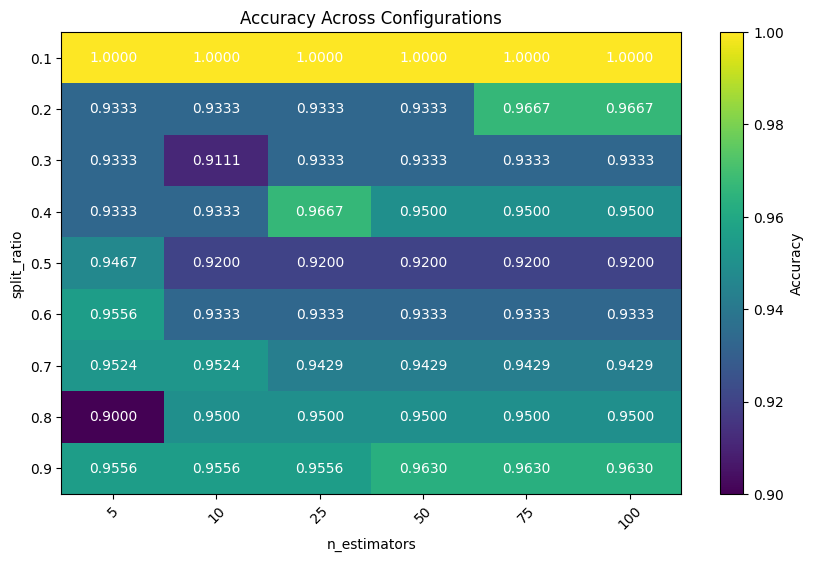

Average Accuracy: 0.9477500000000002


In [20]:
temp_results = runRandomForest(remove_nth_element(iris['data'],0), iris['target'], split_ratios, [5,10,25,50,75,100])
summarizeRandomForrestAccuracy(temp_results) # remove sepal length

average_accuracy = sum(result['accuracy'] for result in temp_results) / len(temp_results) if temp_results else 0.0
print(f'Average Accuracy: {average_accuracy}')

**Without Sepal Width:**

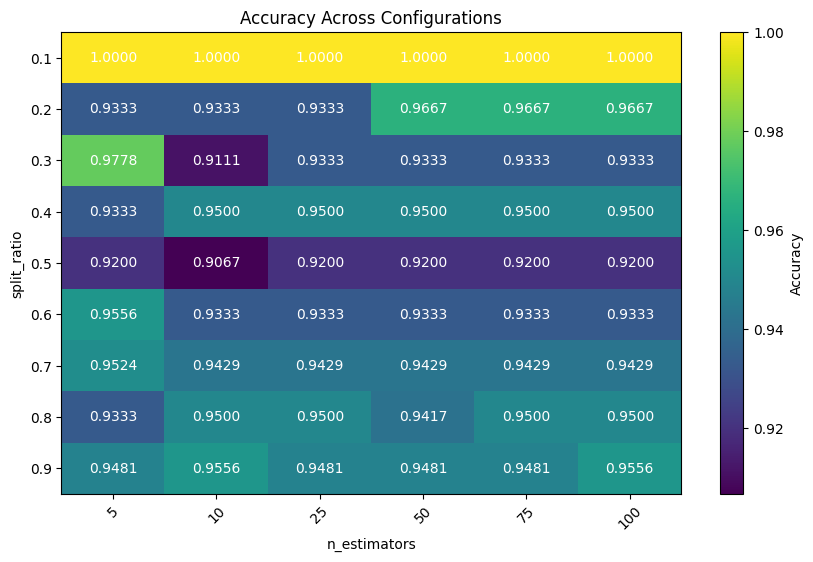

Average Accuracy: 0.9477722222222223


In [21]:
temp_results = runRandomForest(remove_nth_element(iris['data'],1), iris['target'], split_ratios, [5,10,25,50,75,100]) # remove sepal width
summarizeRandomForrestAccuracy(temp_results) # remove sepal length

average_accuracy = sum(result['accuracy'] for result in temp_results) / len(temp_results) if temp_results else 0.0
print(f'Average Accuracy: {average_accuracy}')

**Without Either Sepal Width or Sepal Length:**

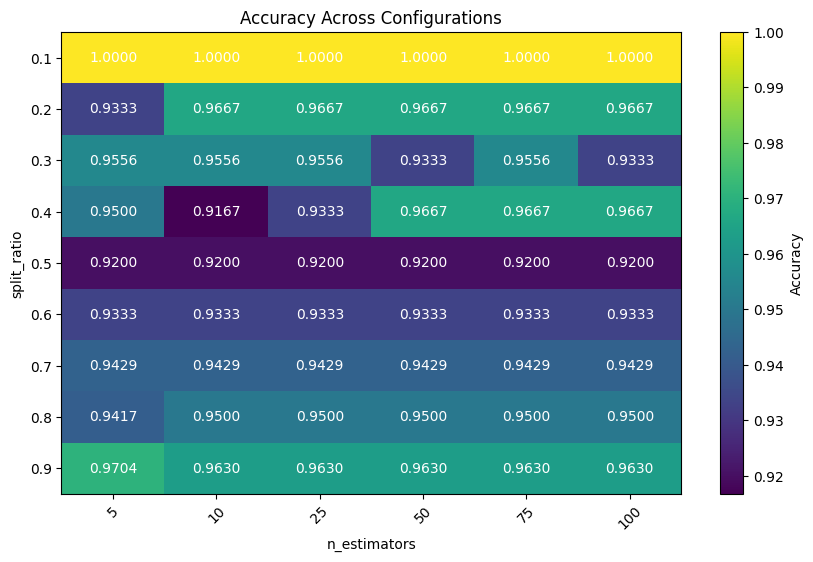

Average Accuracy: 0.9520407407407413


In [22]:
temp_results = runRandomForest(remove_nth_element(remove_nth_element(iris['data'],0),0), iris['target'], split_ratios, [5,10,25,50,75,100]) # remove sepal width
summarizeRandomForrestAccuracy(temp_results) # remove sepal length

average_accuracy = sum(result['accuracy'] for result in temp_results) / len(temp_results) if temp_results else 0.0
print(f'Average Accuracy: {average_accuracy}')

In the results above it is shown that while the average accuracy across configurations may increase when removing the sepal length and/or width, however in testing other random seeds decreases of up to a percent has been encountered.

We can also note that with a 0.1:0.9 test:train split the accuracy of the models across the estimators range continues to be 100% with both the sepal length and width removed.

**Explain why it would be useful to remove these features.**

Decreasing the complexity of the dataset can improve the training time of models. It would also remove the need for that data in the future, so, if for example someone either wants to classify an Iris flower or wants to retrain the model, this will shorten that process by no longer requiring those features to be measured.

Removing these features will also ease the interpretation of the model, for example if the decision structure should be debugged or analyzed.

### 3.3 kNN Questions [4]
Do you think the kNN classifier is best suited to the iris dataset? 

What ideal qualities would the most appropriate dataset display?  

Please answer in the cell below.

#### Do you think the kNN classifier is best suited to the iris dataset?

##### With Respect to classifiers

Attempting to justify kNN to be best suited for to the iris dataset, or the opposite is a difficult feat. As this requires a criteria shared between what should otherwise be constant models, however through the implementation of these models we can see that there are a wide range of possible differences between, for example, even kNN is not as simple as one classifier, we can see that not only does the accuracy of kNN range between the amount of training data available and the k-value trained on, but also the distance metric choice. These types of differences will be further discussed in section 4.

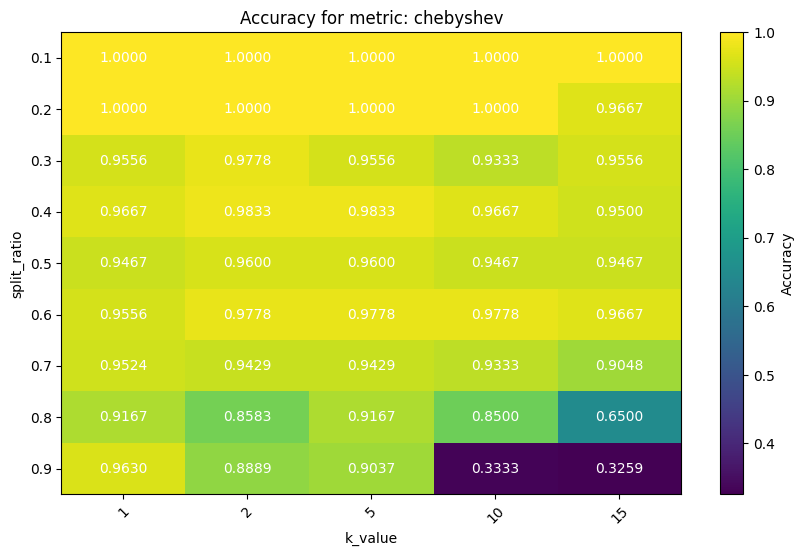

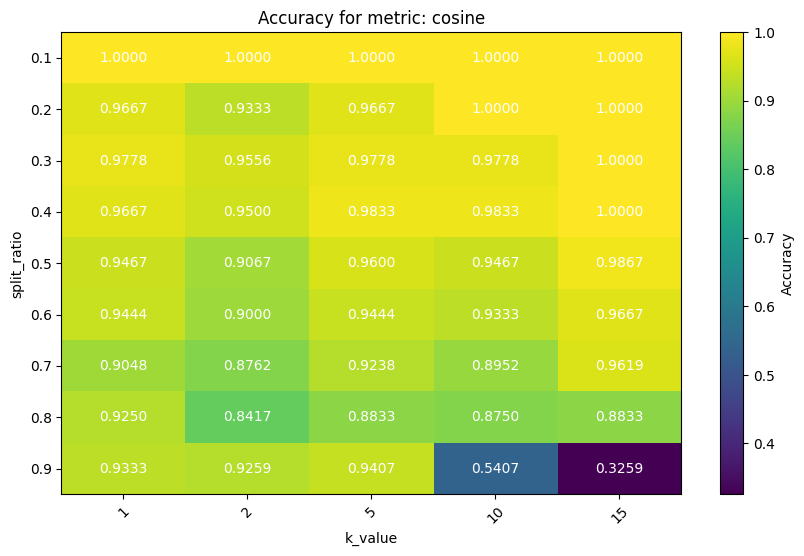

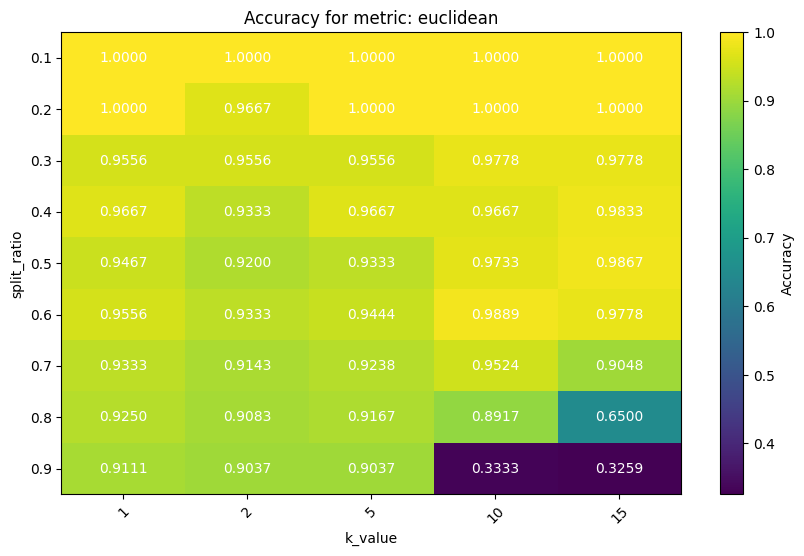

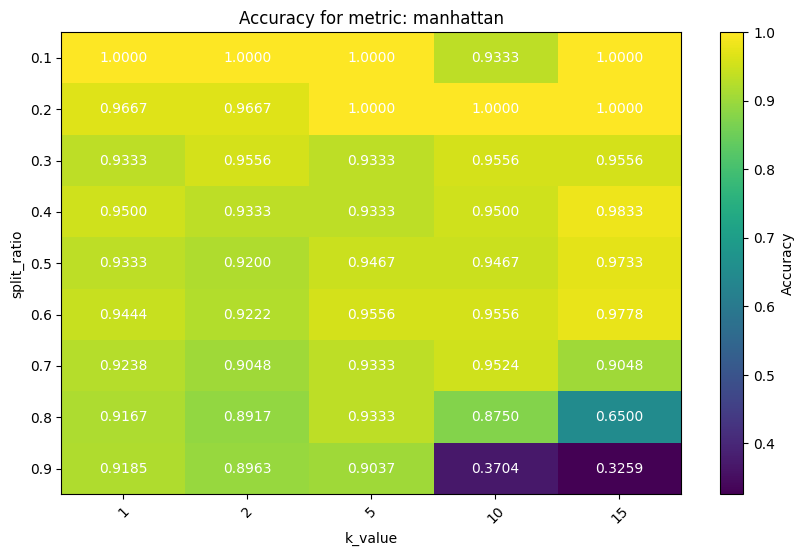

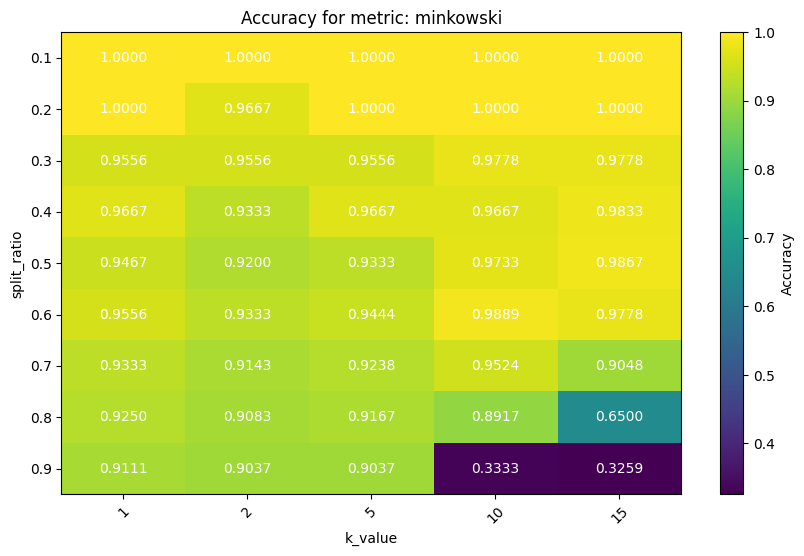

In [23]:
summarizeKnnAccuracy(knn_results)

We can see that the average accuracy of kNN over all models trained on the Iris dataset is roughly 0.9211, which places it a few points behind Random Forest at 0.9459 and above the average of Naive Bayes of 0.6373, however most of the Naive Bayes methods are not well suited for the Iris dataset, but when only comparing kNN to the average accuracy of the Gaussian at 0.9397, the nKK also lags behind.

When delving deeper into the individual accuracy outcomes of kNN, we can see that the overwhelming majority of kNN models have an average accuracy of greater than 0.9, dropping when both larger k-values are used and the training data is limited. While the the Naive Bayes and Random Forest models may have a steeper drop in accuracy between a test set of 0.1 and 0.2, they also tend to preform well on the smaller datasets.

In [24]:
print(f"Naive Bayes Average Accuracy: {sum(result['accuracy'] for result in naive_bayes_results) / len(naive_bayes_results) if naive_bayes_results else 0.0}") # 0.9396777777777778
print(f"Random Forrest Average Accuracy: {sum(result['accuracy'] for result in random_forest_results) / len(random_forest_results) if random_forest_results else 0.0}")
print(f"kNN Average Accuracy: {sum(result['accuracy'] for result in knn_results) / len(knn_results) if knn_results else 0.0}")

Naive Bayes Average Accuracy: 0.6372714285714286
Random Forrest Average Accuracy: 0.945868518518519
kNN Average Accuracy: 0.9211480000000001


In conclusion, based on the available evidence and performance metrics, the k-Nearest Neighbors (kNN) classifier is not the best-suited model for the Iris dataset. Other algorithms, specifically Random Forest, outperform it. Therefore, while kNN is a robust option, it is not the optimal choice for this particular dataset.

##### With respect to datasets

The Iris dataset is often used for classification tasks and is demonstrated as such in the `sklearn` documentation.
The Iris dataset exhibits several ideal qualities. Uniformity, balanced class distribution, and low dimensionality, that make it a strong candidate for kNN classification tasks.

However, the notion of "best suited" is context-dependent, and while the Iris dataset is well-suited for kNN, whether it is "best suited" may hinge on specific research objectives and performance criteria.

#### What ideal qualities would the most appropriate dataset display?  

The ideal dataset suited for a k-Nearest Neighbors (kNN) classifier would have several qualities. Firstly, the data should be uniform in nature, lacking extreme outliers that could impact the distance metrics employed by kNN. This would ensure the reliability of the model's predictions.

Secondly, the dataset should be balanced in terms of class distribution. An imbalanced dataset could introduce bias, leading to suboptimal model performance.

Thirdly, the data dimensions should be considered. Lower-dimensional datasets are generally more suitable for kNN, as high-dimensionality can lead to the "curse of dimensionality," which compromises the distance metrics and thus, the feasibility of the classifier.

Lastly, the ideal dataset should not be overly large in size. The computational complexity of kNN, particularly with respect to real-time classification tasks, can be a limiting factor. Therefore, a dataset of moderate size would be better for efficient model training and prediction.

## 4 Comparing Models [18 marks total]
Please answer the following questions comparing your classifiers.

### 4.1 Compare each model [3]
What differences do you see between your Naïve Bayes classifier, your random forest classifier, and your kNN classifier? 

When comparing Naïve Bayes, Random Forest, and kNN it is important to note the different configurations each have within this study.

For Naïve Bayes the following was considered:
- Naive Bayes Distributions
- Split Ratio (Train/Test split)

For Random Forest:
- N-Estimators (Number of trees in forest)
- Split Ratio

For kNN:
- k-Vales
- Split Ratio
- Distance Metric

Considering these differences, we can see that Naïve Bayes only had decent performance on the Gaussian distribution, whereas the Random Forest and kNN had good performance across their configurations.
Naïve Bayes typically focuses on the type of distribution the data adheres to, like Gaussian, Bernoulli, or Multinomial, so it would make sense that the performance is not good on other distributions.

While not clearly evident in the accuracy matrix, of the Random Forest results, the number of trees is considered to be the the most important parameter, this does indicate that although possible, the increased number of trees not be necessary, and may in this case impact the computational cost of the model, without providing much, if any benefit.

While kNN is usually quite reliant on the k-value and the distance metric, in the case of the Iris dataset, which has very little overlap of classes, the preformance accross models is quite similar, with accuracy increasing based on training data availability.

Naïve Bayes showing good performance only for Gaussian distributions aligns with its theoretical underpinnings, which often assume specific data distributions. Likewise, Random Forest and kNN generally show robust performance across configurations, consistent with their reputation for flexibility.

### 4.2 Accuracy [6]
**Can you explain why there are differences in accuracy between the three classifiers?** 

The observed differences in accuracy across these classifiers can be largely attributed to their internal algorithmic properties, the parameters considered for tuning, and their respective affinities with the properties of the Iris dataset. Every classifier may not be able to adapt equally well to the dataset.

With each classifier's optimal configuration, it can be seen that, for the Iris dataset, all three of these classifiers can be applied with optimal accuracy.

#### Naïve Bayes

The accuracy Naïve Bayes is reliant on the a few aspects, the distribution choice and data volume can be seen to have an impact, with higher volumes making the models less accurate when the incorrect distribution is used.

Naïve Bayes isn't as affected by a smaller dataset, compared to kNN, but is still noticeable, as it is assumed that the data will follow a certain distribution, which will only be affected once the data available to train on no longer represents the true distribution.

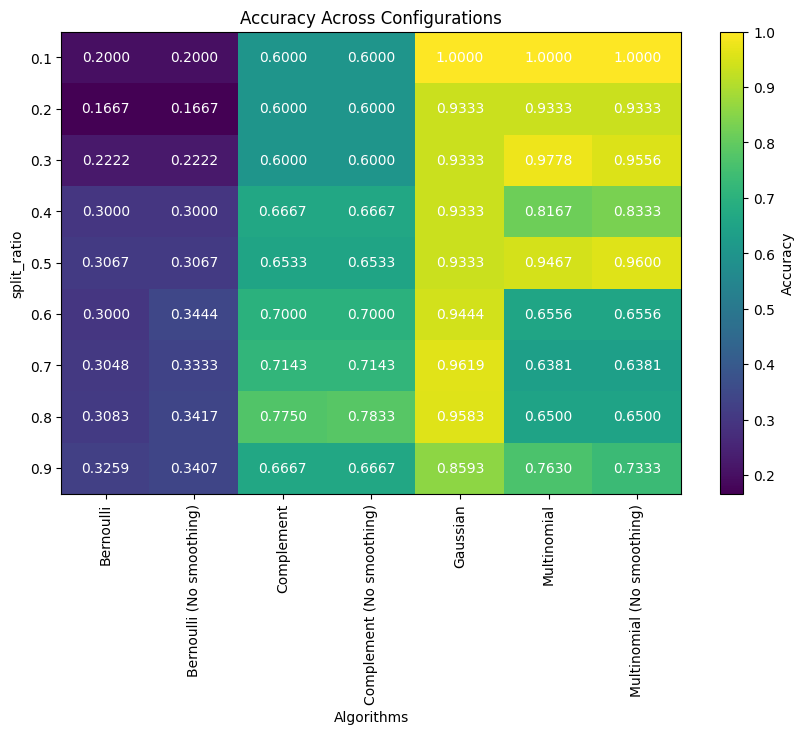

In [25]:
summarizeNaiveBayesAccuracy(naive_bayes_results)

#### Random Forest

Increasing the number of trees did not yield significant benefits in accuracy suggesting a point of diminishing returns for this parameter, which with the limited number of entries in the Iris dataset, may well be reached by 5 trees.

It can be seen that the highest accuracy has been achieved with a 0.1 ratio test set, meaning more training data, with the others ranging from 0.911 to 0.963, but achieving a constant 0.92 at an evenly split data set.
It makes sense that the amount of training data doesn't have a significant impact on the accuracy, as the Iris dataset is well clustered and suited for classification.

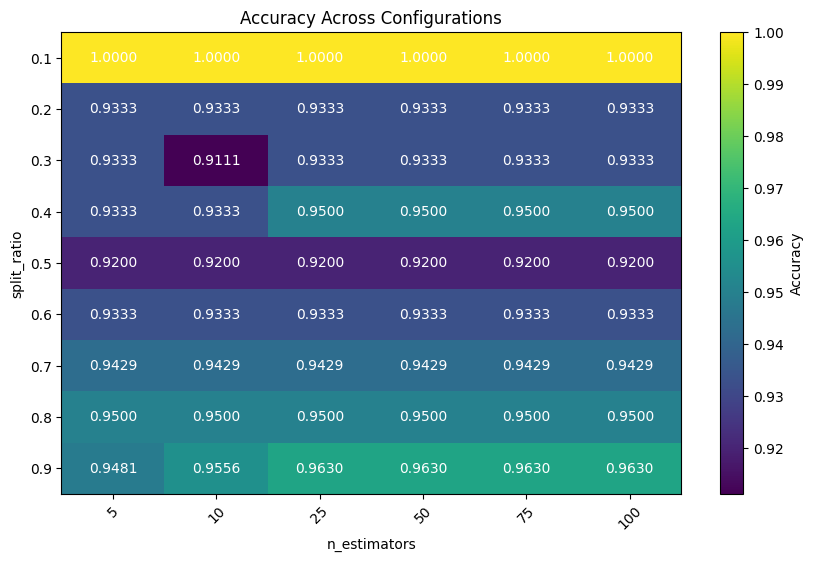

In [26]:
summarizeRandomForrestAccuracy(random_forest_results)

#### kNN

Accuracy was relatively stable. This is likely because the Iris dataset has clear boundaries between classes, making kNN less sensitive to parameter changes.

I the case of the Iris dataset kNN's accuracy only significantly decrease over the other classifiers once a larger number of k values are required while not having a big enough dataset at hand, this makes sense as the classifier wil use the class most frequently occurring within the group of identified neighbor. With limited data, the amount of "true" neighbors is limited and neighbors from much further away will be considered, which may fall in a different cluster.

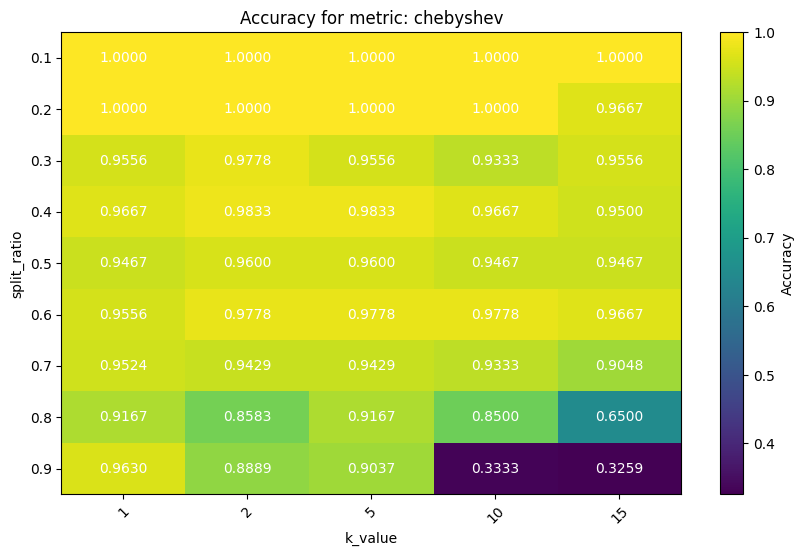

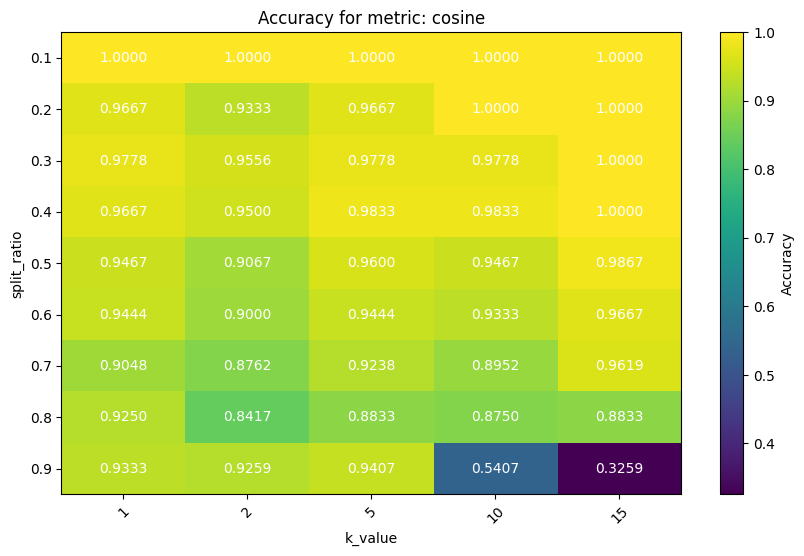

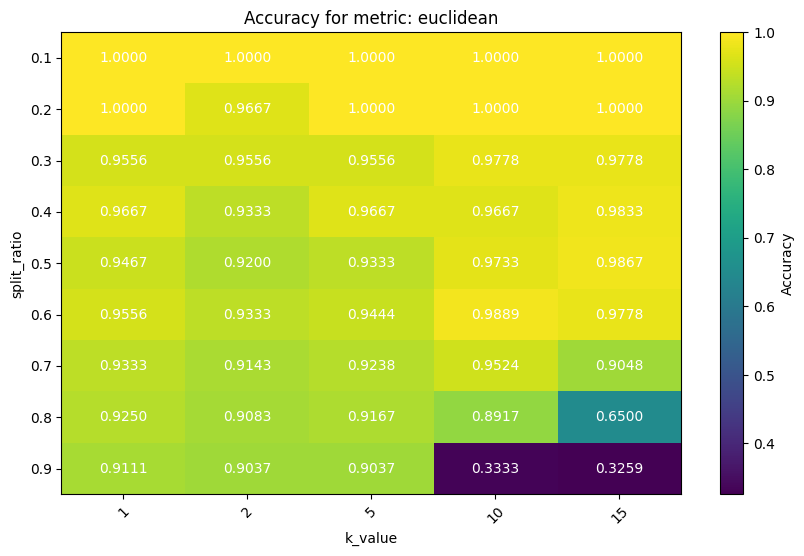

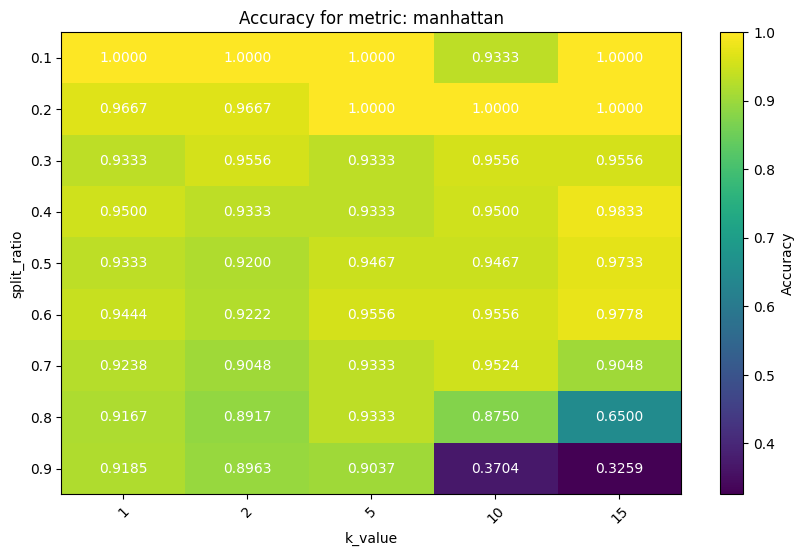

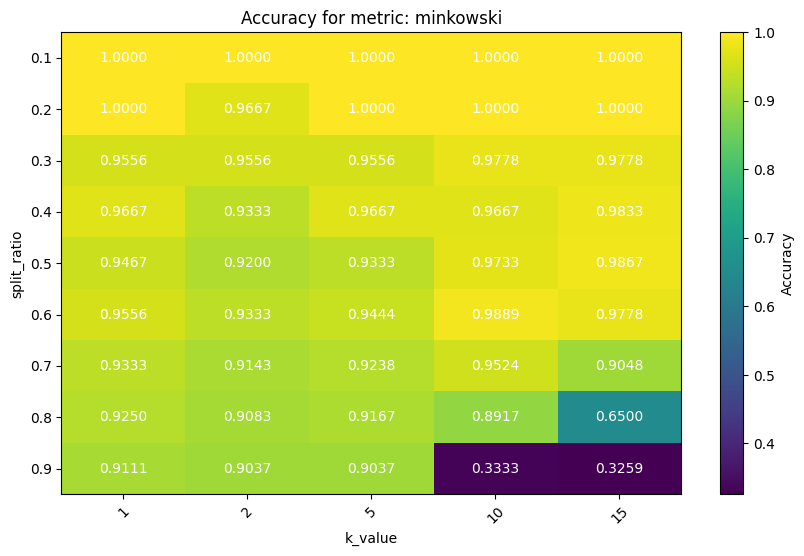

In [27]:
summarizeKnnAccuracy(knn_results)

### 4.3 Appropriate Use [9]
When would it be appropriate to use each different classifier? 

Reference real-world situations and examples of specific data sets and explain why that classifier would be most appropriate for that use-case.

#### Naive Bayes
- **Example:** Spam email classification
- **Dataset:** SpamBase dataset from the UCI Machine Learning Repository
- **Reasoning for Choice:** Given the high dimensionality of text data and the relatively moderate size of most available datasets, Naive Bayes performs exceptionally well here. Its independence assumption for features works reasonably well for word frequencies in email contexts.
- **Why Not Random Forest:** Random Forest can be computationally intensive and might be overkill for such a task. It could potentially over fit to the training data, capturing noise as patterns.
- **Why Not kNN:** kNN might be impractical due to computational cost and storage issues, especially when dealing with high-dimensional text data.

#### Random Forest
- **Example:** Credit Risk Assessment
- **Dataset:** German Credit Risk dataset from the UCI Machine Learning Repository
- **Reasoning for Choice:** Random Forest's ability to manage a plethora of heterogeneous features (both categorical and numerical) makes it ideal for credit risk models. It can efficiently handle high dimensionality and offers robustness through ensemble learning.
- **Why Not Naive Bayes:** The independence assumption of Naive Bayes might not hold well here, given that credit-related features can often be interdependent (e.g., income level and employment status).
- **Why Not kNN:** kNN might suffer in high-dimensional spaces due to the "curse of dimensionality," making its distance metric less meaningful. It also doesn't inherently handle categorical features well, which are often present in credit datasets.

#### k-Nearest Neighbors (kNN)
- **Example:** Recommender Systems (User-item filtering)
- **Dataset:** MovieLens dataset
- **Reasoning for Choice:** In a recommender system, the feature space is generally not high-dimensional, and the decision boundary is highly non-linear and irregular. kNN is excellent for capturing such complex structures without the need for a parametric model.
- **Why Not Naive Bayes:** Naive Bayes is generally not used for recommender systems as it doesn't capture the complex relationships between user-item interactions well due to its independence assumption.
- **Why Not Random Forest:** Random Forest can be computationally intensive for real-time recommendations and might also over fit to the user-item interactions, leading to less generalizable recommendations.

## Referrences

<div class="csl-bib-body" style="line-height: 1.35; ">
  <div class="csl-entry" style="margin-bottom: 1em;"><i>Analysis of German Credit Data</i> (no date). Available at: <a href="https://online.stat.psu.edu/stat508/book/export/html/796">https://online.stat.psu.edu/stat508/book/export/html/796</a> (Accessed: 13 September 2023).</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Adc&amp;rft.type=webpage&amp;rft.title=Analysis%20of%20German%20Credit%20Data&amp;rft.identifier=https%3A%2F%2Fonline.stat.psu.edu%2Fstat508%2Fbook%2Fexport%2Fhtml%2F796"></span>
  <div class="csl-entry" style="margin-bottom: 1em;"><i>Email Spam Filtering Using Naive Bayes Classifier</i> (2021) <i>Springboard Blog</i>. Available at: <a href="https://www.springboard.com/blog/data-science/bayes-spam-filter/">https://www.springboard.com/blog/data-science/bayes-spam-filter/</a> (Accessed: 13 September 2023).</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Adc&amp;rft.type=webpage&amp;rft.title=Email%20Spam%20Filtering%20Using%20Naive%20Bayes%20Classifier&amp;rft.description=Naive%20Bayes%20is%20a%20probabilistic%20algorithm%20based%20on%20the%20Bayes%20Theorem%20used%20for%20email%20spam%20filtering%20in%20data%20analytics.%C2%A0If%20you%20have%20an%20email%20account%2C%20we%20are&amp;rft.identifier=https%3A%2F%2Fwww.springboard.com%2Fblog%2Fdata-science%2Fbayes-spam-filter%2F&amp;rft.date=2021-06-14&amp;rft.language=en"></span>
  <div class="csl-entry" style="margin-bottom: 1em;">guest_blog (2020) ‘Movie Recommendation and Rating Prediction using K-Nearest Neighbors’, <i>Analytics Vidhya</i>, 20 August. Available at: <a href="https://www.analyticsvidhya.com/blog/2020/08/recommendation-system-k-nearest-neighbors/">https://www.analyticsvidhya.com/blog/2020/08/recommendation-system-k-nearest-neighbors/</a> (Accessed: 13 September 2023).</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Adc&amp;rft.type=blogPost&amp;rft.title=Movie%20Recommendation%20and%20Rating%20Prediction%20using%20K-Nearest%20Neighbors&amp;rft.description=knn%20recommender%20system%3A%20How%20to%20make%20movie%20recommendations%20and%20rating%20predictions%20using%20K-Nearest%20Neighbors%20Algorithm.&amp;rft.identifier=https%3A%2F%2Fwww.analyticsvidhya.com%2Fblog%2F2020%2F08%2Frecommendation-system-k-nearest-neighbors%2F&amp;rft.aulast=guest_blog&amp;rft.au=guest_blog&amp;rft.date=2020-08-20&amp;rft.language=en"></span>
  <div class="csl-entry" style="margin-bottom: 1em;">‘How to draw 2D Heatmap using Matplotlib in python?’ (2020) <i>GeeksforGeeks</i>, 25 November. Available at: <a href="https://www.geeksforgeeks.org/how-to-draw-2d-heatmap-using-matplotlib-in-python/">https://www.geeksforgeeks.org/how-to-draw-2d-heatmap-using-matplotlib-in-python/</a> (Accessed: 13 September 2023).</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Adc&amp;rft.type=blogPost&amp;rft.title=How%20to%20draw%202D%20Heatmap%20using%20Matplotlib%20in%20python%3F&amp;rft.description=A%20Computer%20Science%20portal%20for%20geeks.%20It%20contains%20well%20written%2C%20well%20thought%20and%20well%20explained%20computer%20science%20and%20programming%20articles%2C%20quizzes%20and%20practice%2Fcompetitive%20programming%2Fcompany%20interview%20Questions.&amp;rft.identifier=https%3A%2F%2Fwww.geeksforgeeks.org%2Fhow-to-draw-2d-heatmap-using-matplotlib-in-python%2F&amp;rft.date=2020-11-25&amp;rft.language=en-us"></span>
  <div class="csl-entry" style="margin-bottom: 1em;"><i>Lecture 12: Bias Variance Tradeoff</i> (no date). Available at: <a href="https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote12.html">https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote12.html</a> (Accessed: 16 September 2023).</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Adc&amp;rft.type=webpage&amp;rft.title=Lecture%2012%3A%20Bias%20Variance%20Tradeoff&amp;rft.identifier=https%3A%2F%2Fwww.cs.cornell.edu%2Fcourses%2Fcs4780%2F2018fa%2Flectures%2Flecturenote12.html"></span>
  <div class="csl-entry" style="margin-bottom: 1em;"><i>Predicting German Credit Default</i> (no date). Available at: <a href="https://kaggle.com/code/hendraherviawan/predicting-german-credit-default">https://kaggle.com/code/hendraherviawan/predicting-german-credit-default</a> (Accessed: 13 September 2023).</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Adc&amp;rft.type=webpage&amp;rft.title=Predicting%20German%20Credit%20Default&amp;rft.description=Explore%20and%20run%20machine%20learning%20code%20with%20Kaggle%20Notebooks%20%7C%20Using%20data%20from%20multiple%20data%20sources&amp;rft.identifier=https%3A%2F%2Fkaggle.com%2Fcode%2Fhendraherviawan%2Fpredicting-german-credit-default&amp;rft.language=en"></span>
  <div class="csl-entry" style="margin-bottom: 1em;">Ray, S. (2017) ‘Naive Bayes Classifier Explained: Applications and Practice Problems of Naive Bayes Classifier’, <i>Analytics Vidhya</i>, 11 September. Available at: <a href="https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/">https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/</a> (Accessed: 12 September 2023).</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Adc&amp;rft.type=blogPost&amp;rft.title=Naive%20Bayes%20Classifier%20Explained%3A%20Applications%20and%20Practice%20Problems%20of%20Naive%20Bayes%20Classifier&amp;rft.description=Naive%20Bayes%20is%20the%20most%20popular%20machine%20learning%20classification%20method.%20Understand%20Naive%20Bayes%20classifier%20with%20different%20applications%20and%20examples.&amp;rft.identifier=https%3A%2F%2Fwww.analyticsvidhya.com%2Fblog%2F2017%2F09%2Fnaive-bayes-explained%2F&amp;rft.aufirst=Sunil&amp;rft.aulast=Ray&amp;rft.au=Sunil%20Ray&amp;rft.date=2017-09-11&amp;rft.language=en"></span>
  <div class="csl-entry" style="margin-bottom: 1em;">Rengasamy, D. <i>et al.</i> (2022) ‘Feature importance in machine learning models: A fuzzy information fusion approach’, <i>Neurocomputing</i>, 511, pp. 163–174. Available at: <a href="https://doi.org/10.1016/j.neucom.2022.09.053">https://doi.org/10.1016/j.neucom.2022.09.053</a>.</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_id=info%3Adoi%2F10.1016%2Fj.neucom.2022.09.053&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Ajournal&amp;rft.genre=article&amp;rft.atitle=Feature%20importance%20in%20machine%20learning%20models%3A%20A%20fuzzy%20information%20fusion%20approach&amp;rft.jtitle=Neurocomputing&amp;rft.stitle=Neurocomputing&amp;rft.volume=511&amp;rft.aufirst=Divish&amp;rft.aulast=Rengasamy&amp;rft.au=Divish%20Rengasamy&amp;rft.au=Jimiama%20M.%20Mase&amp;rft.au=Aayush%20Kumar&amp;rft.au=Benjamin%20Rothwell&amp;rft.au=Mercedes%20Torres%20Torres&amp;rft.au=Morgan%20R.%20Alexander&amp;rft.au=David%20A.%20Winkler&amp;rft.au=Grazziela%20P.%20Figueredo&amp;rft.date=2022-10-28&amp;rft.pages=163-174&amp;rft.spage=163&amp;rft.epage=174&amp;rft.issn=0925-2312"></span>
  <div class="csl-entry">Singh, S. (2018) <i>Understanding the Bias-Variance Tradeoff</i>, <i>Medium</i>. Available at: <a href="https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229">https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229</a> (Accessed: 16 September 2023).</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Adc&amp;rft.type=webpage&amp;rft.title=Understanding%20the%20Bias-Variance%20Tradeoff&amp;rft.description=Whenever%20we%20discuss%20model%20prediction%2C%20it%E2%80%99s%20important%20to%20understand%20prediction%20errors%20(bias%20and%20variance).%20There%20is%20a%20tradeoff%20between%20a%E2%80%A6&amp;rft.identifier=https%3A%2F%2Ftowardsdatascience.com%2Funderstanding-the-bias-variance-tradeoff-165e6942b229&amp;rft.aufirst=Seema&amp;rft.aulast=Singh&amp;rft.au=Seema%20Singh&amp;rft.date=2018-10-09&amp;rft.language=en"></span>
</div>